In [17]:
%autosave 10
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

Autosaving every 10 seconds


**First, create a dataframe of *cleaned_data.csv*. Then, use scikit-learn's `train_test_split` to make a new set of training and testing data. This time, instead of `EDUCATION`, use `LIMIT_BAL`: the account's credit limit.**

In [6]:
df = pd.read_csv('cleaned_data.csv')
df.head()

X = df['LIMIT_BAL'].values.reshape(-1,1)
Y = df['default payment next month'].values
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.2)

_________________________________________________________________________
**Next, train a logistic regression model using the training data from your split.**


In [36]:
lr_reg = LogisticRegression()
lr_reg.fit(train_x, train_y)
y_pred = lr_reg.predict(test_x)

_________________________________________________________________________
**Then, create the array of predicted probabilities for the testing data.**


In [11]:
y_pred_prob = lr_reg.predict_proba(test_x)

_________________________________________________________________________
**Next, calculate the ROC AUC using the predicted probabilities and the true labels of the testing data. Compare this to the ROC AUC from using the `EDUCATION` feature.**


In [24]:
roc_auc = metrics.roc_auc_score(test_y, y_pred_prob[:,1])
roc_auc
# roc_auc_score of 'EDUCTAION' < roc_auc_score of LIMIT_BAL

0.6392485867482166

_________________________________________________________________________
**Now, plot the ROC curve.**


Text(0.5, 1.0, 'ROC curve')

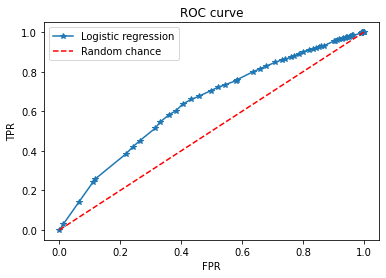

In [27]:
fpr, tpr, thresholds = metrics.roc_curve(test_y, pos_proba)
plt.plot(fpr, tpr, '*-')
plt.plot([0, 1], [0, 1], 'r--')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')

_________________________________________________________________________
**Then, calculate the data for the precision-recall curve on the testing data using scikit-learn functionality.**


In [26]:
precision, recall, _ = metrics.precision_recall_curve(test_y, y_pred_prob[:, 1])


_________________________________________________________________________
**Plot the precision-recall curve using matplotlib.**


Text(0.5, 1.0, 'Precisioc-Recall curve')

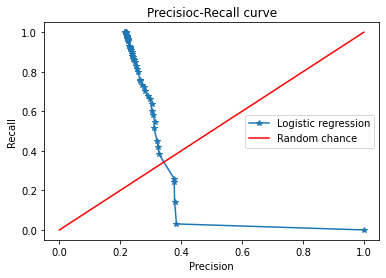

In [28]:
plt.plot(precision, recall, '*-')
plt.plot([0, 1], [0,1], 'red')
plt.legend(['Logistic regression', 'Random chance'])
plt.xlabel('Precision')
plt.ylabel('Recall')
plt.title('Precisioc-Recall curve')

_________________________________________________________________________
**Now, use scikit-learn to calculate the area under the precision-recall curve.**


In [30]:
auc_score = metrics.auc(recall, precision)
auc_score

0.3239850692725807

_________________________________________________________________________
**Finally, recalculate the ROC AUC, except this time do it for the training data.**

In [32]:
roc_auc_f = metrics.roc_auc_score(train_y, lr_reg.predict(train_x) )

0.5

    How is this different, conceptually and quantitatively, from your earlier calculation?
